## Multivariate Analysis

### Overview

Multivariate analysis is the process to find the relationship between three or more features in the dataset

**Visual Exploration**
- 3D scatterplots of predictors colored by outcome.
- Dimensionality reduction (PCA) → project many predictors into 2D and color by outcome.

**Statistical Tests**
- MANOVA → test whether multiple predictors jointly differ across outcome groups.
- Logistic regression / discriminant analysis with multiple predictors → check significance of combined effects.

**Model-Based Exploration**
- Decision tree / random forest → capture non-linear interactions, check feature importance.
- Add interaction terms (e.g. Glucose × BMI × Insulin) in regression to test joint influence.

**Interpretation**
- Do combinations of predictors improve separation between outcome groups?
- Which predictors interact to give stronger signals than alone?
- Are there hidden clusters in higher dimensions aligned with the outcome?

### Preparation

#### Separate predictors and outcome

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

features = df.drop(columns=["Outcome"])
label = df["Outcome"]

### Visual Exploration

#### Description

- Scatterplots: A way to visualize multivariate data to help classify and understand the relationships among the variables.
- Pairplot: Show all 2D scatter plots of each pair of features chosen from 3D Scatterplots.
- Dimensionality Reduction

#### 3D Scatterplots

This part will illustrate the relationships among three or more variables by visualizing it using 3D Scatterplots.

In order to perform 3D Scatterplots graph, we need to choose 3 features in the dataset.

We could not randomly choose 3 features out of 8 features to visualize it and continue doing that until all of feature combinations are used, as it is waste of time. Instead, we could rely on the result from bivariate analysis, typically the **Correlation heatmap**.

From the result, **Glucose** and **BMI** features have the strongest relationship with the outcome. Because of that, we will choose those as the two first features. For the third feature, we will choose variables that are related to diabete disease among the others. **Pregnancies** and **Age** are the most reliable information, as it has strong relationship with the outcome, so we choose those two, and visualize iteratively.

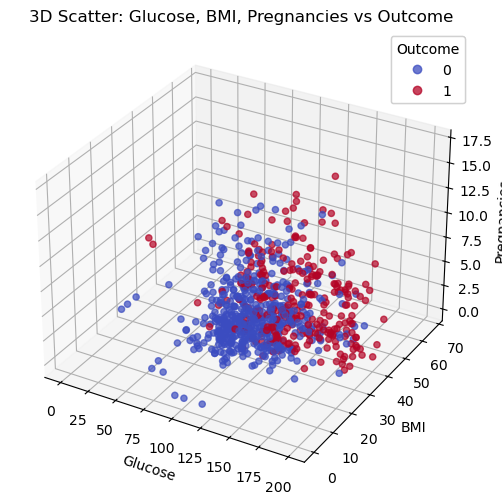

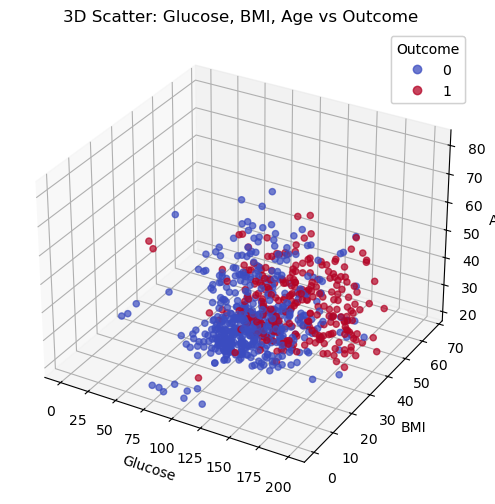

In [2]:
# assume your dataframe is called df
# predictors

x = df['Glucose']
y = df['BMI']
z1 = df['Pregnancies']
z2 = df['Age']
target = df['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose, BMI, Pregnancies vs Outcome')

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose, BMI, Age vs Outcome')

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

The 3D scatterplots show too much overlap from the three chosen features, which can be conclude that three features alone will not fully separate diabetics and non-diabetics. It could be a hint that we should try higher dimensions or smarter approaches.

We will try increase dimensions of the Scatterplots by applying more features into the graph.
We will choose features that have the highest correlation rate with the outcome compared to others
- **4D Scatterplots**: Use all of the chosen features (Glucose, BMI, Pregnancies, Age)
- **5D Scatterplots**: Add DiabetesPedigreeFunction features
- **6D Scatterplots**: Add Insulin features

#### 4D Scatterplots (Glucose, BMI, Pregnancies, Age)

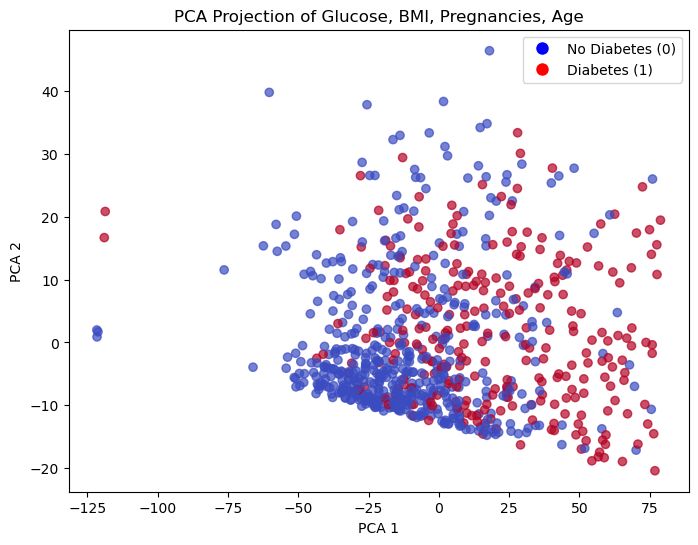

In [3]:
# pick your features
X = df[['Glucose','BMI','Pregnancies','Age']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, Age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes (1)')]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

#### 5D Scatterplots (Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age)

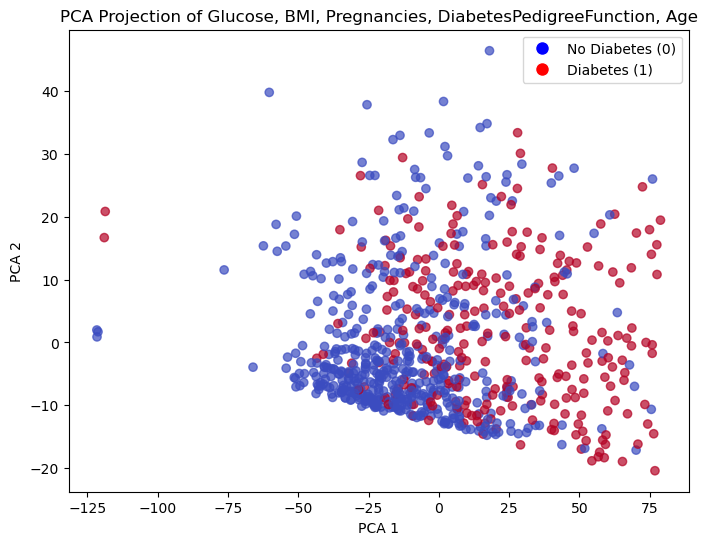

In [4]:
# pick your features
X = df[['Glucose','BMI','DiabetesPedigreeFunction','Age', 'Pregnancies']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, DiabetesPedigreeFunction, Age')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes (1)')]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

#### 6D Scatterplots (Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction)

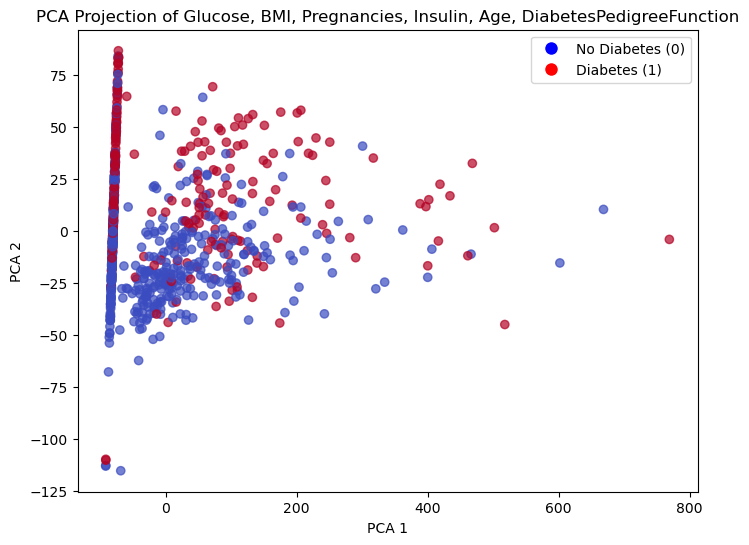

In [5]:
# pick your features
X = df[['Glucose','BMI','Insulin','Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
y = df['Outcome']

# reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Diabetes (1)')]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()


#### Four of it

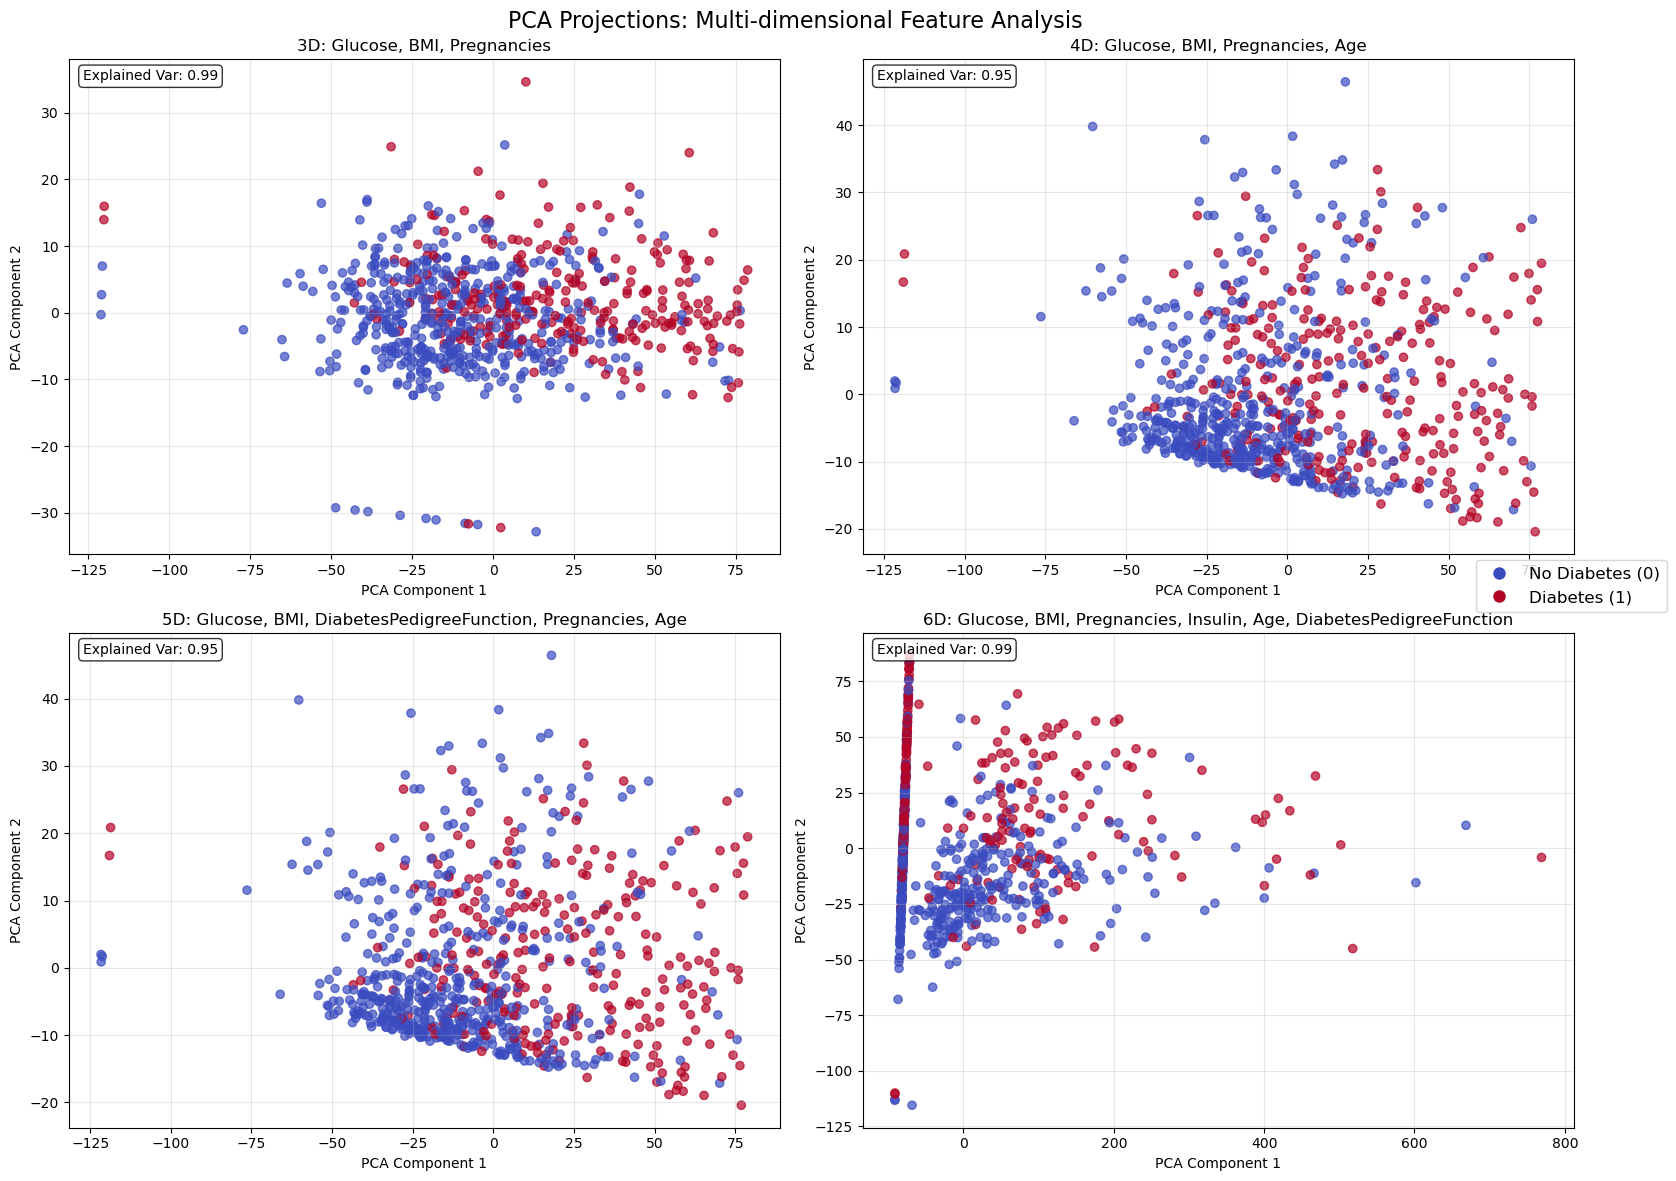

=== PCA EXPLAINED VARIANCE ANALYSIS ===
3D: Glucose, BMI, Pregnancies:
  PC1: 0.936 (93.6%)
  PC2: 0.054 (5.4%)
  Total: 0.990 (99.0%)

4D: Glucose, BMI, Pregnancies, Age:
  PC1: 0.840 (84.0%)
  PC2: 0.106 (10.6%)
  Total: 0.946 (94.6%)

5D: Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age:
  PC1: 0.840 (84.0%)
  PC2: 0.106 (10.6%)
  Total: 0.946 (94.6%)

6D: Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction:
  PC1: 0.923 (92.3%)
  PC2: 0.063 (6.3%)
  Total: 0.987 (98.7%)



In [6]:
# Define the feature combinations
feature_combinations = [
    (['Glucose', 'BMI', 'Pregnancies'], '3D: Glucose, BMI, Pregnancies'),
    (['Glucose','BMI','Pregnancies','Age'], '4D: Glucose, BMI, Pregnancies, Age'),
    (['Glucose','BMI','DiabetesPedigreeFunction','Age', 'Pregnancies'], '5D: Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age'),
    (['Glucose','BMI','Insulin','Age', 'Pregnancies', 'DiabetesPedigreeFunction'], '6D: Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction'),
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('PCA Projections: Multi-dimensional Feature Analysis', fontsize=16, y=0.98)

# Flatten axes for easier iteration
axes = axes.flatten()

# Create PCA plots
for i, (features, title) in enumerate(feature_combinations):
    # Prepare data
    X = df[features]
    y = df['Outcome']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create scatter plot
    scatter = axes[i].scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
    axes[i].set_xlabel('PCA Component 1')
    axes[i].set_ylabel('PCA Component 2')
    axes[i].set_title(title)
    axes[i].grid(True, alpha=0.3)
    
    # Add explained variance to title
    explained_var = pca.explained_variance_ratio_
    axes[i].text(0.02, 0.98, f'Explained Var: {sum(explained_var):.2f}', 
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a single legend instead of colorbar
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#3A4CC0', markersize=10, label='No Diabetes (0)'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B40426', markersize=10, label='Diabetes (1)')]

# Position legend outside the plot area
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.05, 0.5), fontsize=12)


plt.tight_layout()
plt.show()

# Print explained variance for each combination
print("=== PCA EXPLAINED VARIANCE ANALYSIS ===")
for features, title in feature_combinations:
    X = df[features]
    pca = PCA(n_components=2)
    pca.fit(X)
    explained_var = pca.explained_variance_ratio_
    print(f"{title}:")
    print(f"  PC1: {explained_var[0]:.3f} ({explained_var[0]*100:.1f}%)")
    print(f"  PC2: {explained_var[1]:.3f} ({explained_var[1]*100:.1f}%)")
    print(f"  Total: {sum(explained_var):.3f} ({sum(explained_var)*100:.1f}%)")
    print()

#### Class separation analysis of four scatterplots

Since it is hard to determine which dimension is better than which, we will do seperation analysis to see that clearer

In [7]:
from sklearn.metrics import silhouette_score
import numpy as np

# Simple separation analysis
print("\n=== CLASS SEPARATION ANALYSIS ===")
print("Higher values = Better separation between classes\n")

separation_results = []

for features, title in feature_combinations:
    X = df[features]
    y = df['Outcome']
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Calculate separation metrics
    silhouette = silhouette_score(X_pca, y)
    
    # Calculate distance between class centers
    class_0_center = X_pca[y == 0].mean(axis=0)
    class_1_center = X_pca[y == 1].mean(axis=0)
    center_distance = np.linalg.norm(class_1_center - class_0_center)
    
    # Calculate overlap percentage (simple method)
    # Find the range overlap in each dimension
    c0_x_range = [X_pca[y == 0, 0].min(), X_pca[y == 0, 0].max()]
    c1_x_range = [X_pca[y == 1, 0].min(), X_pca[y == 1, 0].max()]
    c0_y_range = [X_pca[y == 0, 1].min(), X_pca[y == 0, 1].max()]
    c1_y_range = [X_pca[y == 1, 1].min(), X_pca[y == 1, 1].max()]
    
    # Calculate overlap in x and y dimensions
    x_overlap = max(0, min(c0_x_range[1], c1_x_range[1]) - max(c0_x_range[0], c1_x_range[0]))
    y_overlap = max(0, min(c0_y_range[1], c1_y_range[1]) - max(c0_y_range[0], c1_y_range[0]))
    
    x_total = max(c0_x_range[1], c1_x_range[1]) - min(c0_x_range[0], c1_x_range[0])
    y_total = max(c0_y_range[1], c1_y_range[1]) - min(c0_y_range[0], c1_y_range[0])
    
    overlap_percentage = ((x_overlap/x_total) + (y_overlap/y_total)) / 2 * 100
    
    separation_results.append({
        'title': title,
        'silhouette_score': silhouette,
        'center_distance': center_distance,
        'overlap_percentage': overlap_percentage
    })
    
    print(f"{title}:")
    print(f"  Silhouette Score: {silhouette:.3f} (range: -1 to 1, higher = better)")
    print(f"  Center Distance: {center_distance:.2f}")
    print(f"  Overlap: {overlap_percentage:.1f}% (lower = better separation)")
    print(f"  Separation: {100-overlap_percentage:.1f}%")


=== CLASS SEPARATION ANALYSIS ===
Higher values = Better separation between classes

3D: Glucose, BMI, Pregnancies:
  Silhouette Score: 0.198 (range: -1 to 1, higher = better)
  Center Distance: 31.67
  Overlap: 91.7% (lower = better separation)
  Separation: 8.3%
4D: Glucose, BMI, Pregnancies, Age:
  Silhouette Score: 0.195 (range: -1 to 1, higher = better)
  Center Distance: 32.07
  Overlap: 86.4% (lower = better separation)
  Separation: 13.6%
5D: Glucose, BMI, DiabetesPedigreeFunction, Pregnancies, Age:
  Silhouette Score: 0.195 (range: -1 to 1, higher = better)
  Center Distance: 32.07
  Overlap: 86.4% (lower = better separation)
  Separation: 13.6%
6D: Glucose, BMI, Pregnancies, Insulin, Age, DiabetesPedigreeFunction:
  Silhouette Score: 0.117 (range: -1 to 1, higher = better)
  Center Distance: 44.92
  Overlap: 92.3% (lower = better separation)
  Separation: 7.7%


The 4D and 5D Scatterplots have the highest proportion of class seperation, and their Silhouette score are the second highest in the entire Scatterplots

### Summary

- Adding too many features is not always a good thing in training ML models.
- Choosing 5 features Glucose, BMI, Pregnancies, Age, and DiabetesPedigreeFunction is the best option if we want to approach the way that choosing features that impact the outcome most

## The end